In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data=pd.read_csv(r"D:/Work/Stevens/SEM 2/python/project/final Project/Machine Learning Data_Clean.csv")
DF=pd.DataFrame(data) 
DFC=DF.dropna()

In [2]:
lm=linear_model.LinearRegression()

We are removing the Column "Date" and "AAPL" as they are not variables to be tested in our linear model

In [3]:
x=DFC.drop(['AAPL','Date'],axis=1)
x

,RRSFS,ConsConf,Fed Rate,HousSt,INDPRO,UnemRate,DURGOOD
0,118651.0,67.5,4.03,1176.0,63.3372,7.3,114535.0
1,118480.0,68.8,4.06,1250.0,63.7864,7.4,114535.0
2,117700.0,76.0,3.98,1297.0,64.3199,7.4,120025.0
3,118156.0,77.2,3.73,1099.0,64.8069,7.4,124470.0
4,118548.0,79.2,3.82,1214.0,65.0202,7.6,125822.0
5,118542.0,80.4,3.76,1145.0,65.0309,7.8,122834.0
6,119044.0,76.6,3.25,1139.0,65.6155,7.7,122590.0
7,119176.0,76.1,3.30,1226.0,65.2948,7.6,120411.0
8,120057.0,75.6,3.22,1186.0,65.4461,7.6,120711.0
9,120413.0,73.3,3.10,1244.0,65.9387,7.3,127392.0


In [4]:
lm.fit(x, DFC['AAPL'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Using the below command we are checking estimatated coefficient of the line of linear regression

In [5]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -1.8313546494248243


Below are the coefficients for each individual variable in our model

In [6]:
pd.DataFrame(list(zip(x.columns,lm.coef_)), columns= ['Indicators','EstimatedCoefficients'])

,Indicators,EstimatedCoefficients
0,RRSFS,0.003113
1,ConsConf,0.899004
2,Fed Rate,-8.227594
3,HousSt,-0.054142
4,INDPRO,-5.613075
5,UnemRate,-9.369664
6,DURGOOD,0.000619


We are using the different commands from matplotlib.pyplot to see the relationship between unemployment and AAPL value. we are using unemployemnet as it has the highest measure

Text(0.5, 1.0, 'Relationship between Unemployment Rate and AAPL Value')

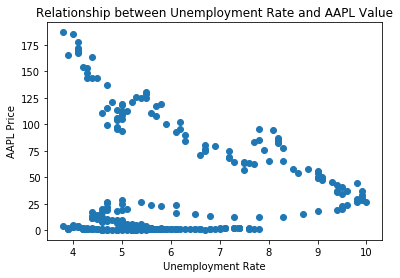

In [7]:
plt.scatter(DFC.UnemRate,DFC.AAPL)
plt.xlabel("Unemployment Rate")
plt.ylabel("AAPL Price")
plt.title("Relationship between Unemployment Rate and AAPL Value")

Below are the first five predictions from our predictive model

In [8]:
lm.predict(x)[0:5]

array([-21.61287428, -28.68822294, -26.12725973, -10.83454811,
       -17.01741039])

Below is a scatterplot of the price vs the predicted value

Text(0.5, 1.0, 'Actual vs. Predicted Price')

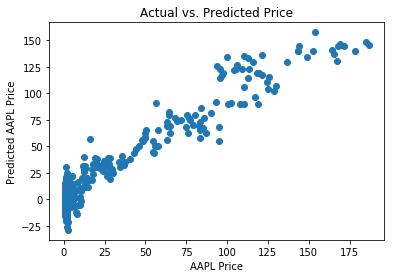

In [9]:
plt.scatter(DFC.AAPL, lm.predict(x))
plt.xlabel("AAPL Price")
plt.ylabel("Predicted AAPL Price")
plt.title("Actual vs. Predicted Price")

In [10]:
MSE=np.mean((DFC.AAPL-lm.predict(x))**2)
MSE

177.26425667812902

70% of the data will be training data with the remaining 30% being used as our test data.  We are using the sklearn package for this. The code below is splitting the data

In [11]:
x=DFC.drop(['AAPL','Date'],axis=1)
y = DFC['AAPL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

 The code below is fitting the data as well as running the predictions

In [12]:
lm.fit(x_train,y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

The code below is creasting the MSE for both the training and test data based on the training and testing models run above.

In [13]:
lm.predict(x_train)
TrainMSE= np.mean((y_train-lm.predict(x_train)) ** 2)
TestMSE= np.mean((y_test-lm.predict(x_test)) ** 2)

Using print command we will check the Mean Squared Error value of both test and trained data

In [14]:
print (TrainMSE)
print (TestMSE)

185.61743037676513
161.74023683575226


Below is a scatterplot for both our training and test residuals with blue indicating our trianing data and test indicated by green.  THe blackline would represent and MSE of 0.

Text(0.5, 1.0, 'Residual Plot between Training and Test Data')

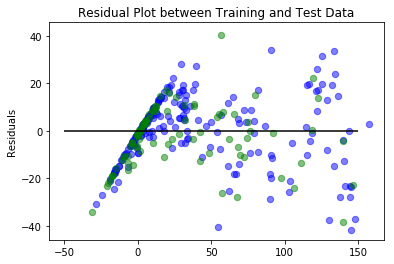

In [15]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,c='b', s=40, alpha=.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,c='g', s=40, alpha=.5)
plt.hlines(y=0,xmin=-50,xmax=150)
plt.ylabel("Residuals")
plt.title("Residual Plot between Training and Test Data")